In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

from statsmodels.tsa.api import Holt

from sklearn.metrics import mean_squared_error

In [7]:
df = pd.read_csv(r"C:\PG_DBDA\Advance analytics classwork\Advanced_Analytics\Datasets\FRED-NROUST.csv")
df

,Date,Value
0,01-01-1949,5.255053
1,01-04-1949,5.261516
2,01-07-1949,5.268013
3,01-10-1949,5.274564
4,01-01-1950,5.281182
...,...,...
327,01-10-2030,4.294982
328,01-01-2031,4.289282
329,01-04-2031,4.283630
330,01-07-2031,4.278029


In [8]:
# PArtitioning of data
y = df['Value']
y_train = df['Value'][:-8]
y_test = df['Value'][-8:]

In [9]:
print(y_test)

324    4.312261
325    4.306486
326    4.300721
327    4.294982
328    4.289282
329    4.283630
330    4.278029
331    4.272470
Name: Value, dtype: float64


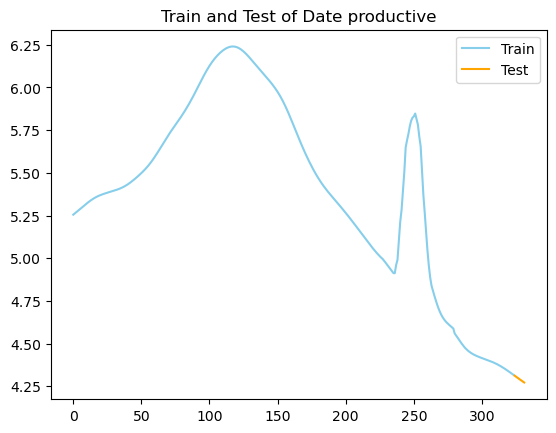

In [10]:
plt.plot(y_train, color = 'skyblue', label = 'Train')
plt.plot(y_test, color = 'orange', label = 'Test')
plt.legend(loc = 'best')
plt.title("Train and Test of Date productive")
plt.show()

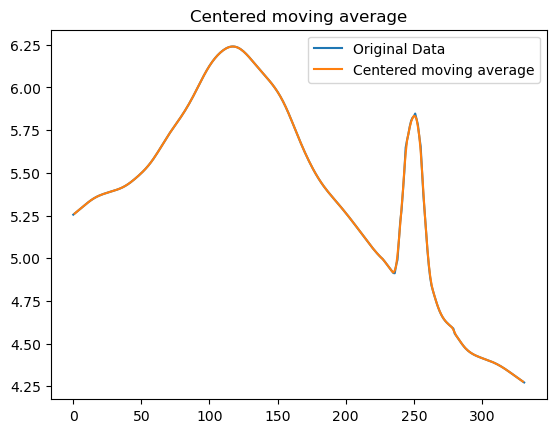

In [11]:
# Centered MA
# here 3 shows the span 
fcast = y.rolling(3, center = True).mean()
plt.plot(y, label = 'Original Data')
plt.plot(fcast, label = 'Centered moving average')
plt.legend(loc = 'best')
plt.title("Centered moving average")
plt.show()


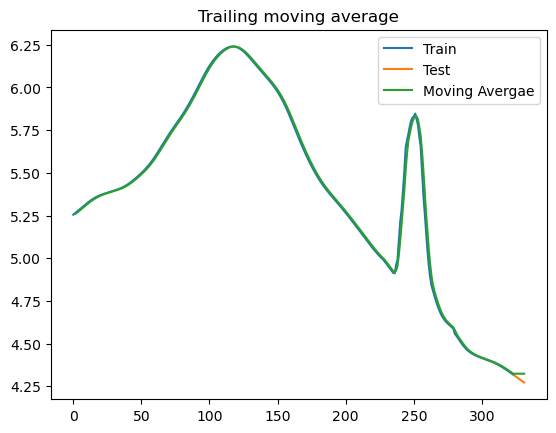

In [12]:
# Trailing MA
# span 3 is used
span = 3
fcast = y_train.rolling(span).mean()
last_val = fcast.iloc[-1]
MA_series = pd.Series(last_val.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index = True)
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(MA_fcast, label = 'Moving Avergae')
plt.legend(loc = 'best')
plt.title("Trailing moving average")
plt.show()

In [13]:
# evaluating span = 3
rmse = np.sqrt(mean_squared_error(y_test, MA_series))
print("RMSE = ", rmse)

RMSE =  0.03411541600561418


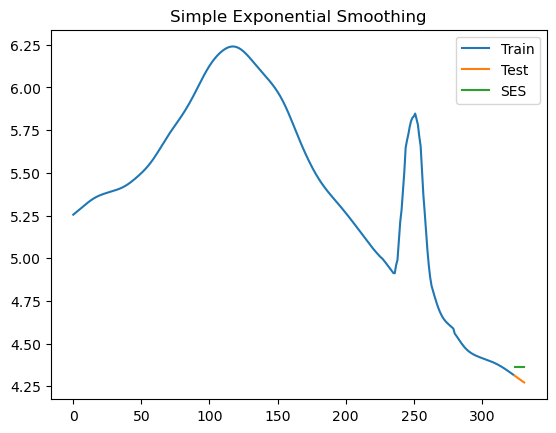

In [18]:
######## Simple Exponential Smoothing #############
# alpha = 0.1
fit1 = SimpleExpSmoothing(y_train).fit(smoothing_level = alpha)
fcast1 = fit1.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast1, label = 'SES')
plt.legend(loc = 'best')
plt.title("Simple Exponential Smoothing")
plt.show()

In [19]:
# EVALUATING..
# lower rmse is preferred, as it signifies the error

rmse = np.sqrt(mean_squared_error(y_test, fcast1))
print("RMSE = ", rmse)

RMSE =  0.07293938664259401


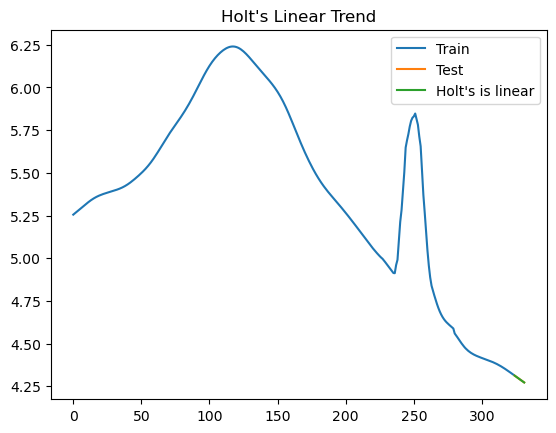

In [20]:
################### Holt's Linear Trend #################
alpha = 0.1
beta = 0.9
fit2 = Holt(y_train).fit()
fcast2 = fit2.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt's is linear")
plt.legend(loc = 'best')
plt.title("Holt's Linear Trend")
plt.show()


In [21]:
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)

RMSE =  0.0001621851939742334


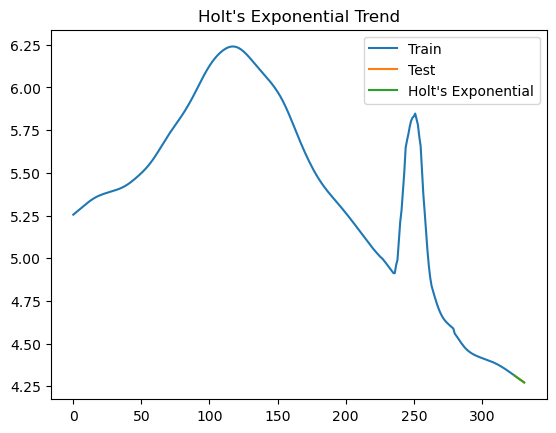

In [22]:
########## Holt's Exponential trend ###############
alpha = 0.1
beta = 0.8
fit2 = Holt(y_train, exponential = True).fit()
fcast2 = fit2.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt's Exponential")
plt.legend(loc = 'best')
plt.title("Holt's Exponential Trend")
plt.show()


In [23]:
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)


RMSE =  0.00010854078656540467


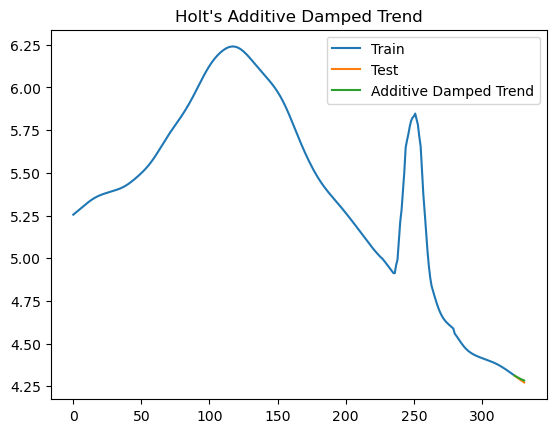

In [24]:
####### Additive Trend ###############
alpha=0.1
beta=0.8
phi=0.2
fit2 = Holt(y_train,damped_trend=True).fit()
fcast2 = fit2.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast2, label="Additive Damped Trend")
plt.legend(loc='best')
plt.title("Holt's Additive Damped Trend")
plt.show()

In [25]:
# Evaluating..
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE = ", rmse)

RMSE =  0.00641507935606987


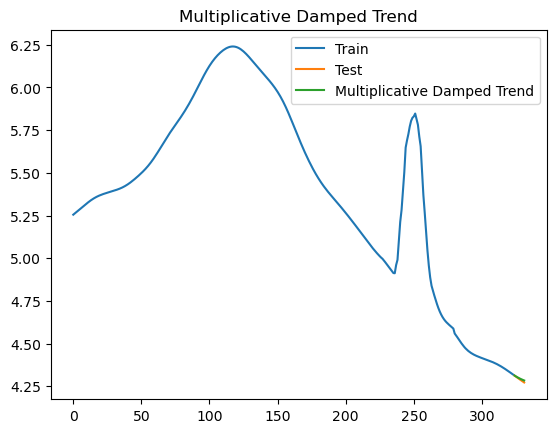

In [26]:
########## Multiplicative Trend #################
# alpha=0.1
# beta=0.8
# phi=0.2
fit2 = Holt(y_train,damped_trend=True,exponential=True).fit()
fcast2 = fit2.forecast(len(y_test))

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast2, label="Multiplicative Damped Trend")
plt.legend(loc='best')
plt.title("Multiplicative Damped Trend")
plt.show()

In [27]:
#### Evaluating
rmse = np.sqrt(mean_squared_error(y_test, fcast2))
print("RMSE =",rmse)

RMSE = 0.006447897805855952


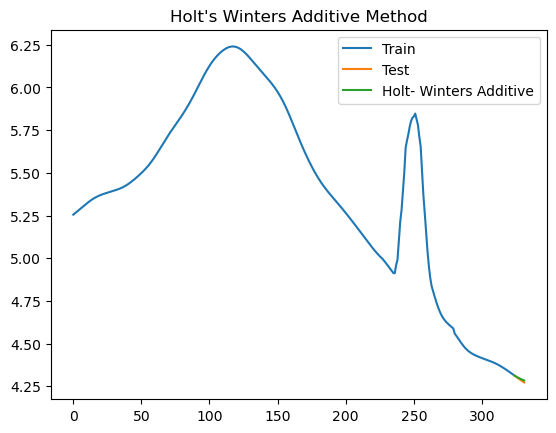

In [28]:
######## Holt- Winters Additive #################
# alpha = 0.1
# beta = 0.8
# gamma = 0.3
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 4,
                           trend = 'add', seasonal = 'add').fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt- Winters Additive")
plt.legend(loc = 'best')
plt.title("Holt's Winters Additive Method")
plt.show()

In [29]:
# Evaluating..
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  0.009336693368476723


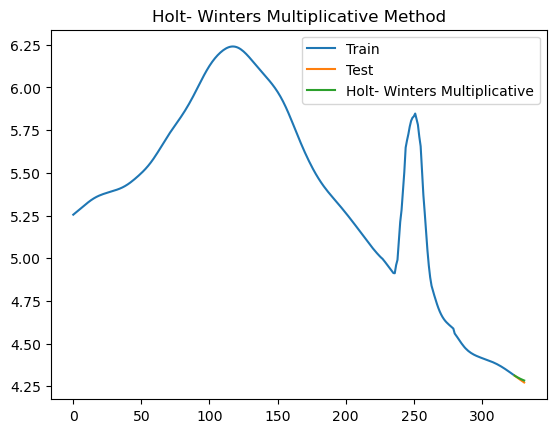

In [30]:
######## Holts Winters Multiplicative #############
# alpha = 0.1
# beta = 0.8
# gamma = 0.3
fit3 = ExponentialSmoothing(y_train, seasonal_periods = 4,
                           trend = 'add', seasonal = 'mul').fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label = 'Train')
plt.plot(y_test, label = 'Test')
plt.plot(fcast2, label = "Holt- Winters Multiplicative")
plt.legend(loc = 'best')
plt.title("Holt- Winters Multiplicative Method")
plt.show()

In [31]:
# Evaluating..
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE = ", rmse)

RMSE =  0.007257397227386402


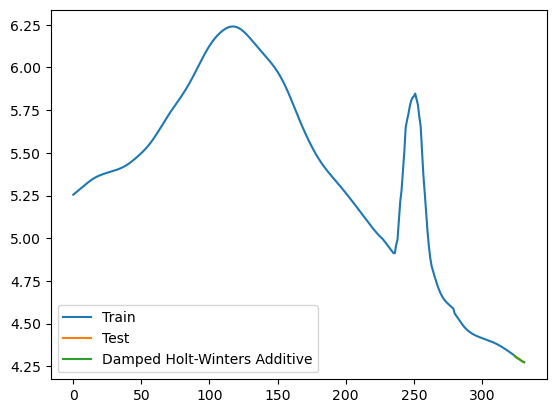

In [33]:
################## Damped Holt-Winters Additive ####################
# from statsmodels.tsa.api import ExponentialSmoothing

fit3 = ExponentialSmoothing(y_train,seasonal_periods=4, damped_trend=True,
                            trend='add', seasonal='add').fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast3, label="Damped Holt-Winters Additive")
plt.legend(loc='best')
plt.show()

In [34]:
#### Evaluating
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE =",rmse)

RMSE = 0.00221782052679256


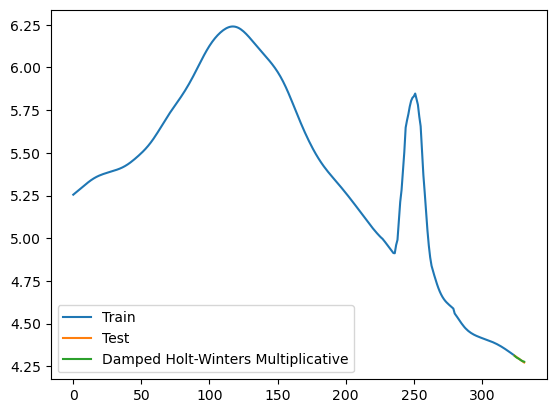

In [35]:
################## Damped Holt-Winters Multiplicative ####################

fit3 = ExponentialSmoothing(y_train,seasonal_periods=4, damped_trend=True, 
                            trend='add', seasonal='mul').fit()
fcast3 = fit3.forecast(len(y_test))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(fcast3, label="Damped Holt-Winters Multiplicative")
plt.legend(loc='best')
plt.show()

In [36]:
#### Evaluating
rmse = np.sqrt(mean_squared_error(y_test, fcast3))
print("RMSE =",rmse)

RMSE = 0.0020281204734395554
